# Data Description: 
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


# Import necessary libraries

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes


# Import data

In [0]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()  # to show the first 5 rows of a pandas dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- All the columns seem to be numeric, although not necesarily continuous 
- Let's check the datatypes, shape and number of missing values in the dataframe to see if there are read as numerical attributes

# Exploratory data analysis
- **Shape**
- **Meta info**
- **Descriptive stats**
- **Distributions**
- **Correlations**
    

In [0]:
df.set_index('ID', inplace = True)    # As a personal preference, setting the 'ID' column as the index column

In [0]:
df.info()  # Meta info about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


- The dataset is of shape (5000,13)
- No sign of missing values
- All the columns are read as numeric columns (either float or int) 
- Continuous and kinda continuous columns :  'Age', 'Experience', 'Income','Family', 'CCAvg', and 'Mortgage'       
- Categorical columns : 'ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online' and 'CreditCard'

In [0]:
df.describe().T  # descriptive statistics of each of the attributes

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


- 'Age' has a fairly smooth ascension from min to max could mean we won't have many outliers and the distribution is not skewed
- 'Experience' has a negative value. It could either be a typo or missing value. Since we do not have anyone to consult, lets consider it as a typo and move on...
- 'Experience' also has a fairly smooth ascension from min to max could mean we won't have many outliers and the distribution is not skewed
- 'Income' is has a huge spread and there seem to be a good number of outliers. The uneven ascension suggests the data is probably left skewed
- 'Mortgage' looks interesting. It is heavily skewed as 50% of the data is zero and from the column description, it looks like valid data.

In [0]:
df.drop(columns='ZIP Code', inplace = True)   # It is a pure judgment call to drop zip code

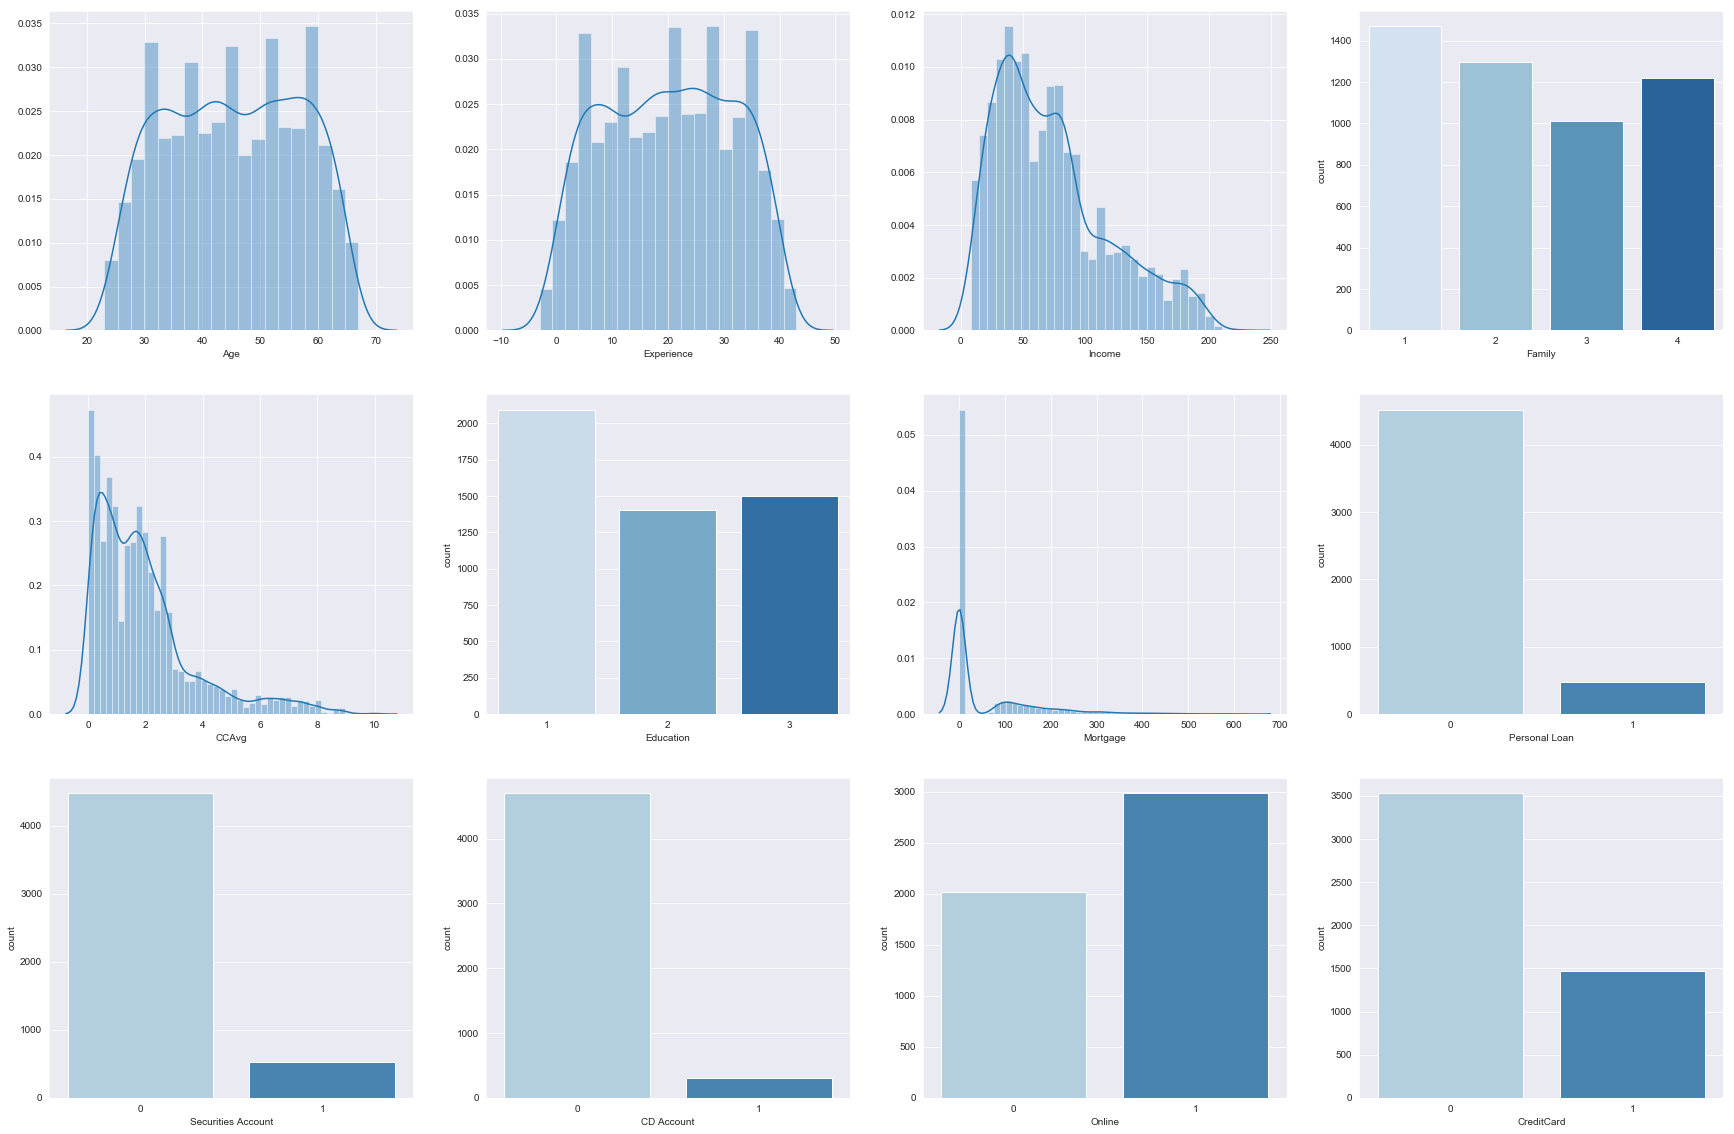

In [0]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(3, 4, pos)   # plot grid
    if feature in ['Age', 'Experience', 'Income','CCAvg', 'Mortgage']:   # Plot histogram for all the continuous columns
         sns.distplot(df[feature], kde= True )   
    else:
        sns.countplot(df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  


- 'Age' is quiet uniformly distributed
- 'Age' and 'Experience' are almost identical for obvious reasons. But not entirely. Let's see if we can get something out of it
- 'Income' and 'CCAvg' are understandably right skewed. As a lot of people would be working for a little more than minimum wage, and most people are around the mid-income level and as the income increases there are fewer and fewer rich people
- From the 'Education' plot, we see majority are undergraduates and surprisingly there are more people with professional degrees than there are people with post-graduate degrees. Professional courses seem to be getting more and more popular [#greatlearning](https://www.greatlearning.in/)
- We have already seen that 'Mortgage' is quiet sparse
- 'Personal Loan' (the target column), 'Securities Account' and 'CD Account' are heavily imbalanced
- Majority of the customers seem to be using online internet banking 
- There are far more people who do not use credit card than there are who do

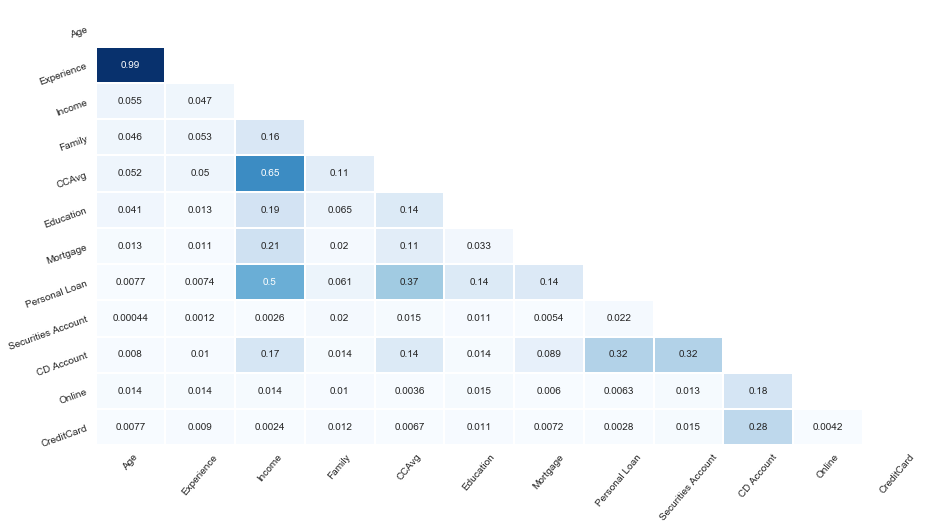

In [0]:
# Correlation among the attributes

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


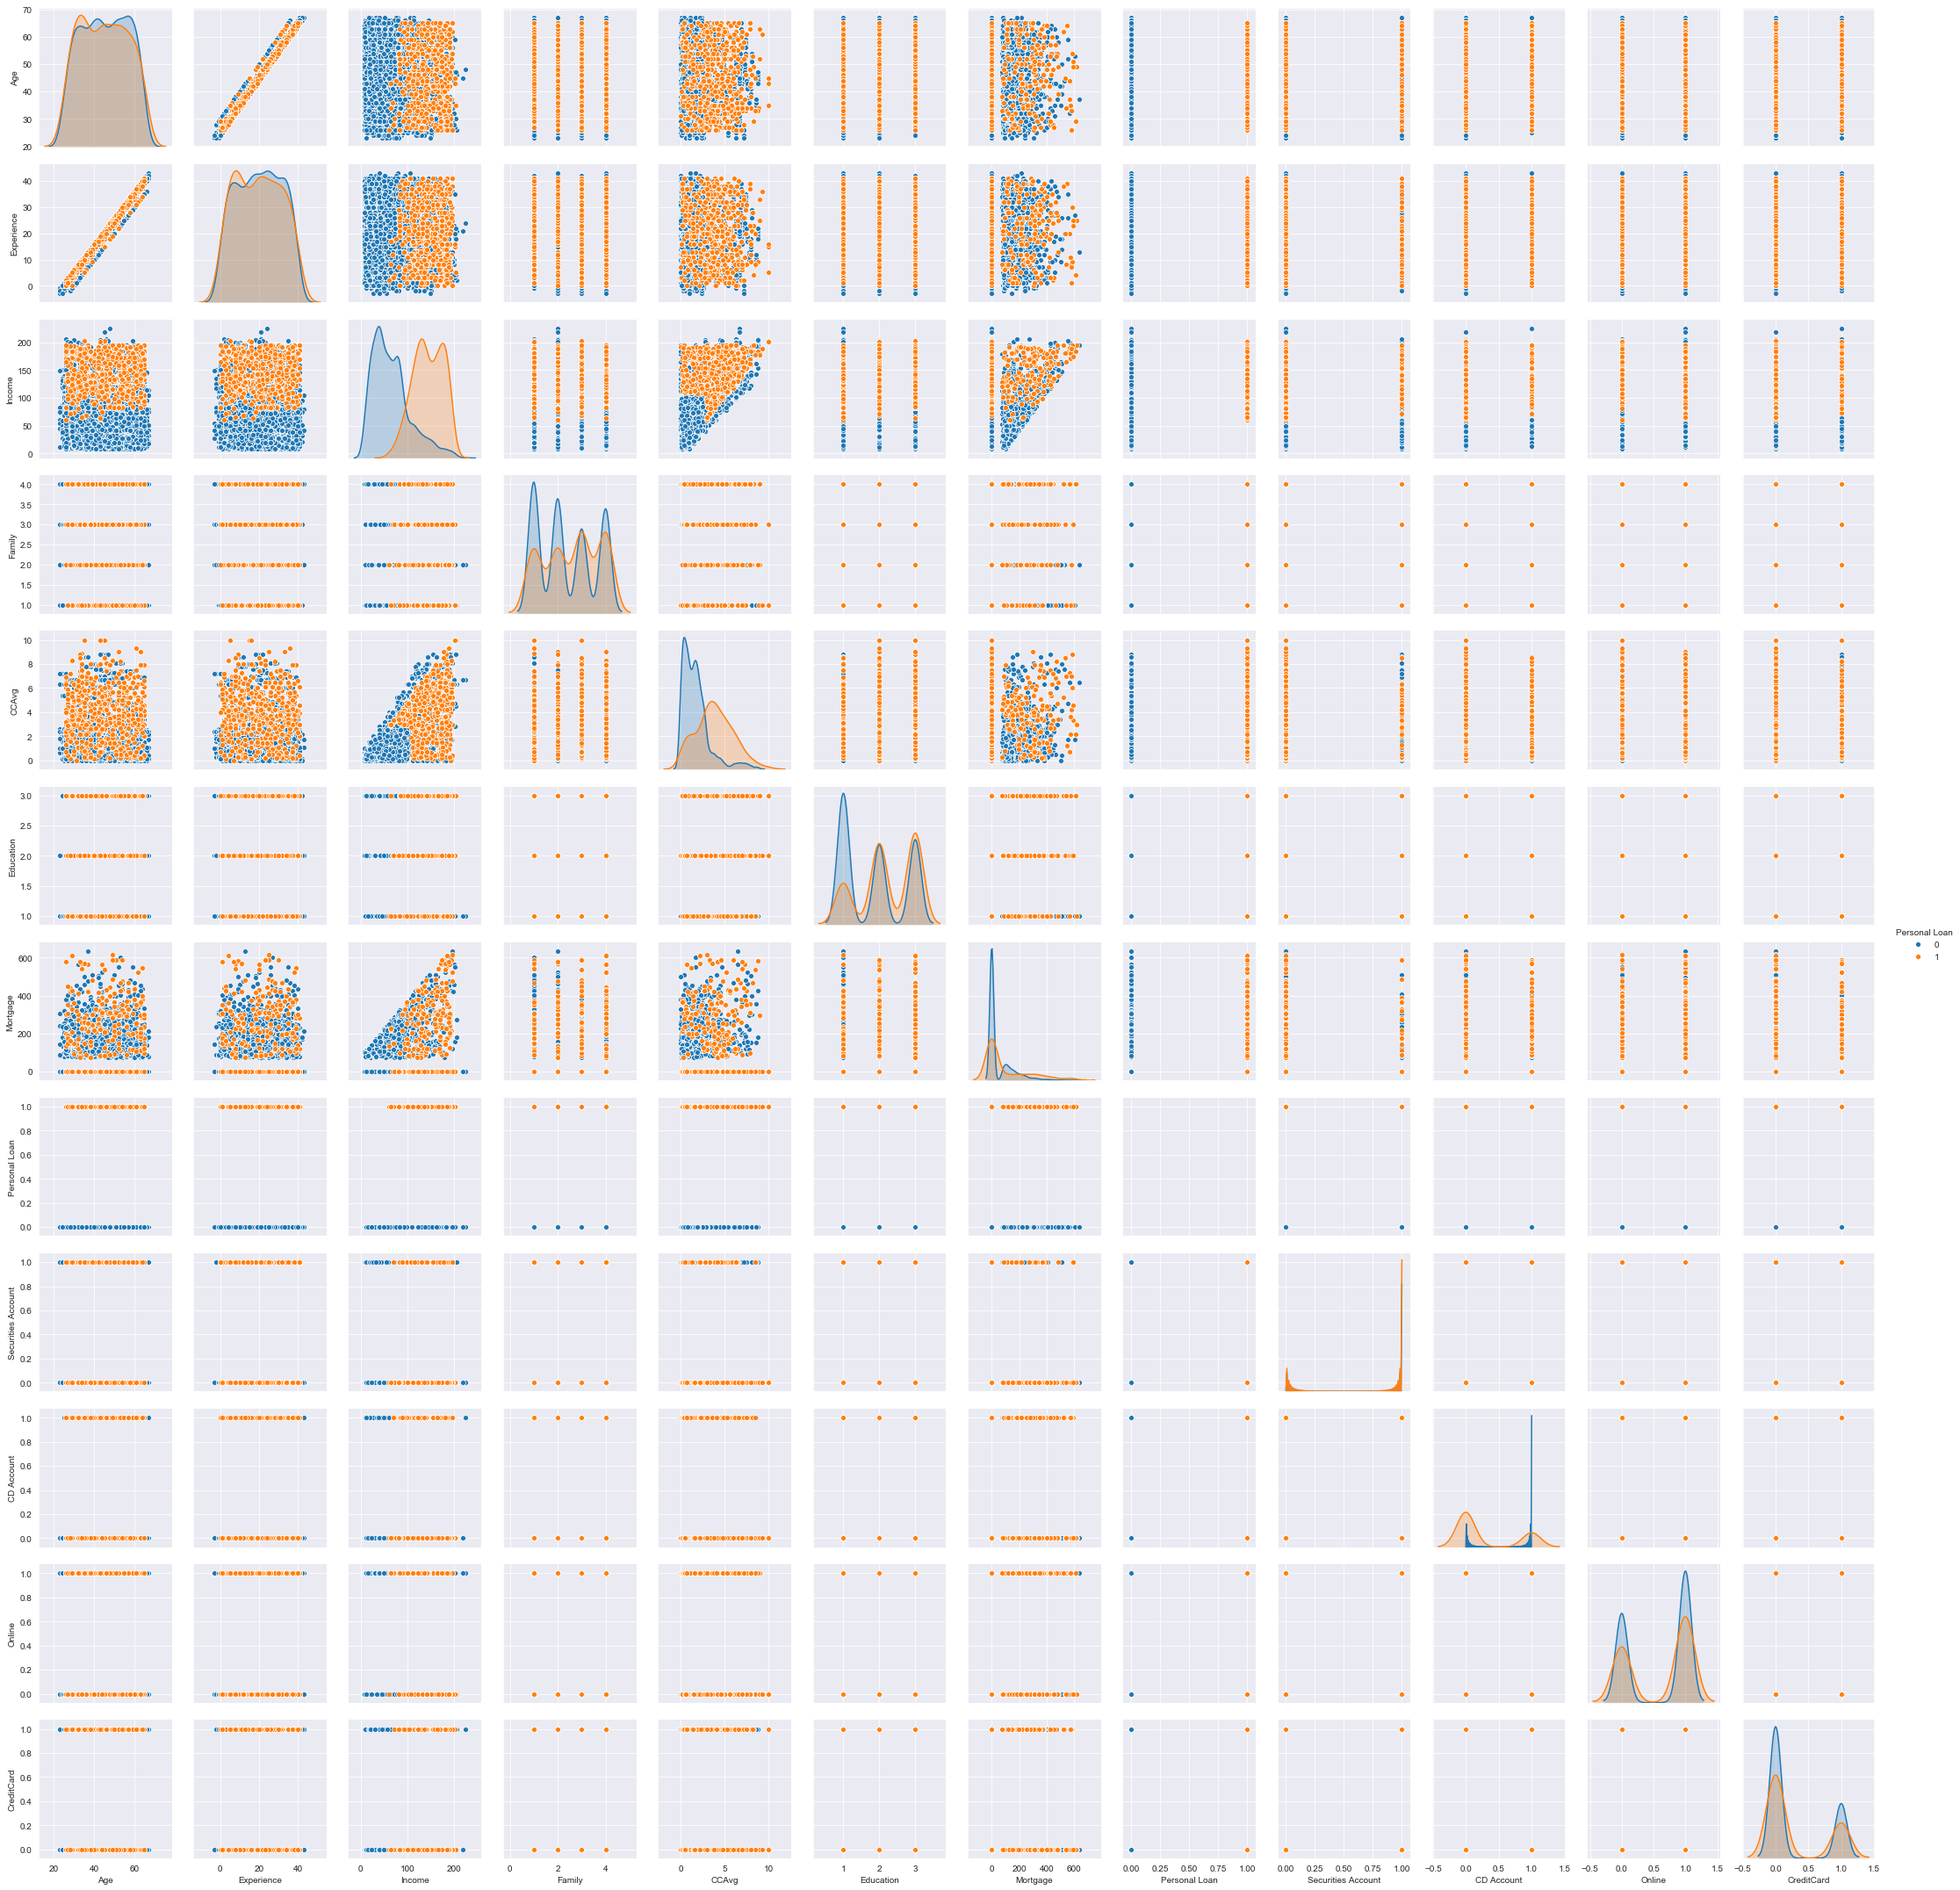

In [0]:
sns.pairplot(df, hue = 'Personal Loan', diag_kind='kde')    # pairplot
plt.show()

- Heavy correlation between 'Age' and 'Experience'
- Good amount of correlation between 'Income' and 'credit card spending'
- 'Mortgage has an interesting correlation with 'Income'. Even though their correlation is not hign in the typical sense, looks like for a given income level, the customer is having only certain amount of mortgage
- 'Income' and 'CCAvg' individually seem to be good predictors of the target

# Prepare data for training
- **One-hot encode the categorical attributes**
- **Standardize the continuous attributes**
- **Seperate Predictors from the target**
- **Split the data into test and train sets**

In [0]:
# As a personal choice, treating 'Education' as a purely categorical column

df = pd.get_dummies(df, columns= ['Education'], drop_first=True) # one-hot encoding the 'education' variable


In [0]:
X = df.drop(columns='Personal Loan')    # Predictors
y = df.loc[:,'Personal Loan']   # target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y) # Split data into test and train

# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']])

X_train_scaled = scaler.transform(X_train.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']])
X_test_scaled = scaler.transform(X_test.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']])


X_train.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']] = X_train_scaled 
X_test.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']] = X_test_scaled

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
# Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  # return all the metrics
    

# Training and Evaluation

In [0]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [0]:
    result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result1

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.954,0.625,0.862,0.989,0.725
1,KNN,0.951,0.500,0.984,0.999,0.663
2,Naive Bayes',0.893,0.592,0.455,0.925,0.515
3,SVM,0.962,0.608,0.986,0.999,0.752


- All the models have good accuracies. But....
- All the models have terrible recall. This is a result of the heavy class imbalance that we have in the target column
- There are a few thing that we can do to get better predictions
- We can use more sophisticated models
- We can play with the features aka feature engineering
- We can play with the hyperparameters of the models that we already used

### 2nd Iteration
- **Drop the 'Age' column**

In [0]:
X_train2 = X_train.drop(columns = 'Age')
X_test2 = X_test.drop(columns = 'Age')

In [0]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train2, X_test2, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train2, X_test2, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train2, X_test2, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train2, X_test2, y_train, y_test )


In [0]:
# Print all the results in a single dataframe

result2 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result2

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.955,0.625,0.872,0.990,0.728
1,KNN,0.956,0.542,1.000,1.000,0.703
2,Naive Bayes',0.893,0.592,0.455,0.925,0.515
3,SVM,0.962,0.608,0.986,0.999,0.752


- Let's try upsampling

### 3rd Iteration

In [0]:
# We do upsampling only from the train dataset to preserve the sanctity of the test data

extra_samples = y_train[y_train == 1].sample(1000,replace = True, random_state=1).index # Generate duplicate samples
y_train = y_train.append(y_train.loc[extra_samples])  # use the index of the duplicate samples to append to the y_train

extra_samples = X_train.loc[extra_samples]   # use the same index to generate duplicate rows in X_train
X_train = X_train.append(extra_samples)  # append these duplicate rows to X_train

In [0]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,X_train, X_test, y_train, y_test)

svm = SVC(gamma = 'auto')
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,X_train, X_test, y_train, y_test )


In [0]:
result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result3

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.934,0.767,0.630,0.952,0.692
1,KNN,0.951,0.708,0.766,0.977,0.736
2,Naive Bayes',0.885,0.717,0.439,0.903,0.545
3,SVM,0.971,0.850,0.850,0.984,0.850


- SVM performed best among all the others

### 4th Iteration
- **Basic Feature Engineering - Creating a custom feature**

In [0]:
# Let's try some custom features

X_train['custom_1'] = X_train['Age'] - X_train['Experience']
X_train.drop(columns='Experience', inplace = True)

X_test['custom_1'] = X_test['Age'] - X_test['Experience']
X_test.drop(columns='Experience', inplace = True)

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,X_train, X_test, y_train, y_test)

svm = SVC(gamma = 'auto')
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,X_train, X_test, y_train, y_test )


result4 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result4

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.933,0.767,0.622,0.950,0.687
1,KNN,0.953,0.742,0.761,0.975,0.751
2,Naive Bayes',0.886,0.717,0.441,0.904,0.546
3,SVM,0.972,0.850,0.857,0.985,0.853


- Knn's recall improved by 4%
- SVM's accuracy improved by 0.1%

### 5th Iteration
- **Another custom feature**

In [0]:
X_train['custom_2'] = X_train['CCAvg']/X_train['CCAvg']
X_train.drop(columns= 'Income', inplace=True)

X_test['custom_2'] = X_test['CCAvg']/X_test['CCAvg']
X_test.drop(columns= 'Income', inplace=True)


C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,X_train, X_test, y_train, y_test)

svm = SVC(gamma = 'auto')
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,X_train, X_test, y_train, y_test )


result5 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result5

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.920,0.650,0.574,0.949,0.610
1,KNN,0.918,0.558,0.573,0.956,0.565
2,Naive Bayes',0.886,0.567,0.430,0.920,0.489
3,SVM,0.949,0.692,0.755,0.976,0.722


# Best Result

In [0]:
result4

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.933,0.767,0.622,0.950,0.687
1,KNN,0.953,0.742,0.761,0.975,0.751
2,Naive Bayes',0.886,0.717,0.441,0.904,0.546
3,SVM,0.972,0.850,0.857,0.985,0.853


# Conclusion: 
- **Post five iterations, SVM seems to be the go-to model for this dataset**


# Remarks:
- **There is possibility that the model is only good for certain test data**
- **We will address the above issue and learn how to evaluate a model using Cross-validation so that we end up with a model that is more reliable**